In [30]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk import word_tokenize
from wordcloud import STOPWORDS

Find dominant unigrams and bigrams

In [8]:
train_df = pd.read_csv('../input/train.csv')


In [10]:
train_df['processed'] = train_df['question_text'].apply(lambda row: word_tokenize(row))
train_df['processed'] = train_df['processed'].apply(lambda row: [token for token in row if token.isalpha()])
train_df['processed'] = train_df['processed'].apply(lambda row: [token.lower() for token in row])
train_df['processed'] = train_df['processed'].apply(lambda row: [token for token in row if token not in STOPWORDS])
train_df.head()

In [14]:
sincere_df = train_df[train_df["target"]==0]
insincere_df = train_df[train_df["target"]==1]

## Unigrams

Count the dominant unigrams in each class and plot them

### Insincere Unigrams

In [19]:
token_dict = {}
for row in insincere_df.itertuples(index=False):
    for token in row.processed:
        if token in token_dict:
            token_dict[token] += 1
        else:
            token_dict[token] = 1


{'tyrannosaurus': 1, 'poltical': 1, 'beleifs': 1, 'savegely': 1, 'raccoons': 1, 'mildest': 1, 'ifs': 1, 'ies': 1, 'angelo': 1, 'kardasian': 1, 'levi': 1, 'delicacy': 1, 'anglocentric': 1, 'astoundingly': 1, 'lumberyard': 1, 'incinerators': 1, 'misfit': 1, 'homeschooled': 1, 'experimented': 1, 'oher': 1, 'potion': 1, 'appreciators': 1, 'fancies': 1, 'holocausts': 1, 'initiator': 1, 'pursuer': 1, 'wallows': 1, 'helplessly': 1, 'dunking': 1, 'alligators': 1, 'scorpions': 1, 'outstretched': 1, 'warding': 1, 'henpecked': 1, 'uproot': 1, 'correspondent': 1, 'farook': 1, 'clogged': 1, 'hermetic': 1, 'esoterica': 1, 'robbie': 1, 'conundrum': 1, 'galilee': 1, 'antique': 1, 'accomplishes': 1, 'narikoravar': 1, 'oked': 1, 'toch': 1, 'eulogize': 1, 'radicalise': 1, 'golfer': 1, 'misleaders': 1, 'loudmouths': 1, 'saracens': 1, 'normans': 1, 'kinship': 1, 'marrige': 1, 'vagena': 1, 'cheques': 1, 'underinformed': 1, 'diversify': 1, 'roj': 1, 'hilata': 1, 'teamed': 1, 'subsaharan': 1, 'paragon': 1, 'e

In [25]:
sorted_unigrams = {token: count for token, count in sorted(token_dict.items(), key=lambda item: item[1], reverse=True)}
top_unigrams = dict(itertools.islice(sorted_unigrams.items(), 15))
print(top_unigrams)

{'people': 12954, 'trump': 6466, 'women': 5959, 'will': 4635, 'men': 4216, 'think': 3887, 'white': 3714, 'many': 3571, 'muslims': 3492, 'quora': 3407}


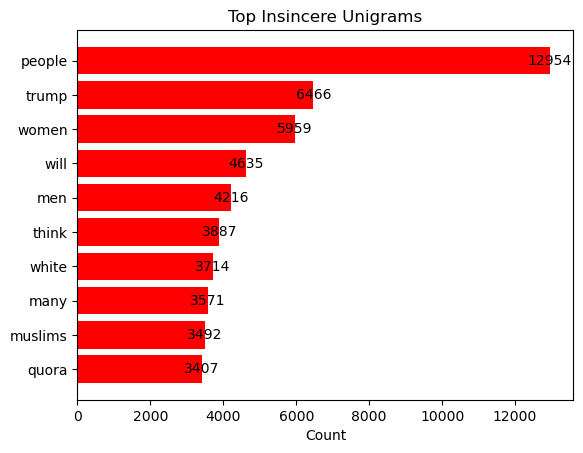

In [43]:
labels = list(top_unigrams.keys())
fig, ax = plt.subplots()

plt.barh(labels, top_unigrams.values(), color='red')
for i, label in enumerate(top_unigrams.values()):
    # ax.text(label + 3, i + .25, str(label))
    ax.text(label, i, str(label), ha='center', va='center')

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Top Insincere Unigrams')


plt.show()

Sincere Unigrams

In [44]:
token_dict = {}
for row in sincere_df.itertuples(index=False):
    for token in row.processed:
        if token in token_dict:
            token_dict[token] += 1
        else:
            token_dict[token] = 1

In [45]:
sorted_unigrams = {token: count for token, count in sorted(token_dict.items(), key=lambda item: item[1], reverse=True)}
top_unigrams = dict(itertools.islice(sorted_unigrams.items(), 15))
print(top_unigrams)

{'best': 61636, 'will': 45999, 'people': 43397, 'good': 36813, 'one': 32242, 'india': 29350, 'make': 26233, 'time': 22197, 'think': 22145, 'someone': 21846}


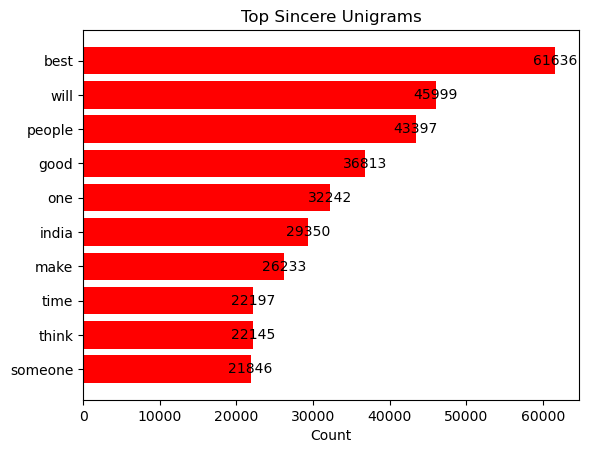

In [47]:
labels = list(top_unigrams.keys())
fig, ax = plt.subplots()

plt.barh(labels, top_unigrams.values(), color='red')
for i, label in enumerate(top_unigrams.values()):
    # ax.text(label + 3, i + .25, str(label))
    ax.text(label, i, str(label), ha='center', va='center')

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Top Sincere Unigrams')


plt.show()

## Bigrams

### Insincere Bigrams

In [54]:
token_dict = {}
for row in insincere_df.itertuples(index=False):
    token_count = len(row.processed)

    for i in range(token_count):
        if i == token_count - 1:
            continue

        bigram = " ".join([row.processed[i], row.processed[i+1]])
        if bigram in token_dict:
            token_dict[bigram] += 1
        else:
            token_dict[bigram] = 1

In [57]:
sorted_bigrams = {token: count for token, count in sorted(token_dict.items(), key=lambda item: item[1], reverse=True)}
top_bigrams = dict(itertools.islice(sorted_bigrams.items(), 15))
print(top_bigrams)

{'donald trump': 1438, 'white people': 877, 'black people': 813, 'don t': 671, 'united states': 581, 'president trump': 479, 'trump supporters': 416, 'many people': 401, 'hillary clinton': 401, 'year old': 370, 'even though': 342, 'people think': 317, 'chinese people': 308, 'north korea': 259, 'indian muslims': 257}


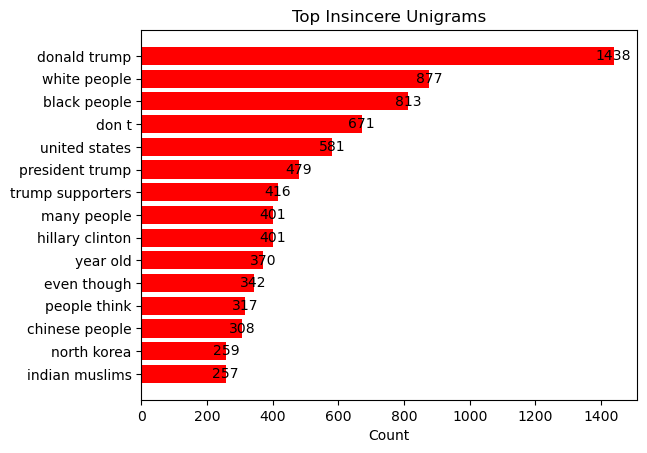

In [58]:
labels = list(top_bigrams.keys())
fig, ax = plt.subplots()

plt.barh(labels, top_bigrams.values(), color='red')
for i, label in enumerate(top_bigrams.values()):
    # ax.text(label + 3, i + .25, str(label))
    ax.text(label, i, str(label), ha='center', va='center')

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Top Insincere Bigrams')


plt.show()


### Sincere Bigrams

In [59]:
token_dict = {}
for row in sincere_df.itertuples(index=False):
    token_count = len(row.processed)

    for i in range(token_count):
        if i == token_count - 1:
            continue

        bigram = " ".join([row.processed[i], row.processed[i+1]])
        if bigram in token_dict:
            token_dict[bigram] += 1
        else:
            token_dict[bigram] = 1

In [60]:
sorted_bigrams = {token: count for token, count in sorted(token_dict.items(), key=lambda item: item[1], reverse=True)}
top_bigrams = dict(itertools.islice(sorted_bigrams.items(), 15))
print(top_bigrams)

{'best way': 7010, 'year old': 3370, 'united states': 3139, 'high school': 2689, 'computer science': 2630, 'will happen': 2207, 'donald trump': 2075, 'social media': 2056, 'many people': 2018, 'even though': 1884, 'long take': 1860, 'years old': 1663, 'don t': 1596, 'north korea': 1571, 'jee mains': 1493}


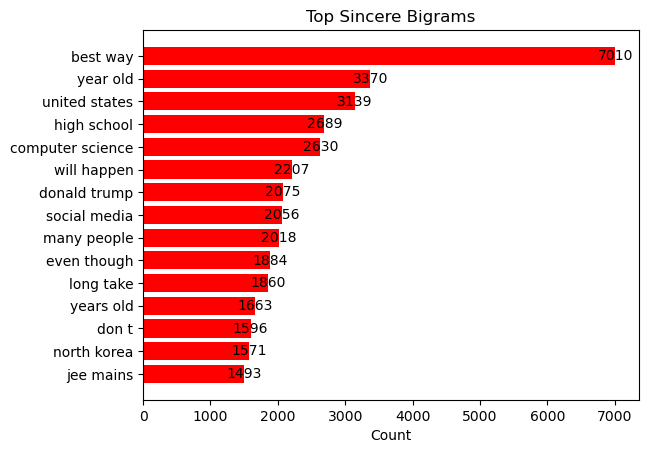

In [61]:
labels = list(top_bigrams.keys())
fig, ax = plt.subplots()

plt.barh(labels, top_bigrams.values(), color='red')
for i, label in enumerate(top_bigrams.values()):
    # ax.text(label + 3, i + .25, str(label))
    ax.text(label, i, str(label), ha='center', va='center')

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Top Sincere Bigrams')


plt.show()